In [4]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')


import pandas as pd

# Read red wine data set

In [5]:
df = pd.read_csv("winequality-red.csv", sep=',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# We have 11 features and quality as target

In [8]:
x_columns = 11
x = df.iloc[:,0:x_columns].values 
y = df.iloc[:, x_columns].values

In [9]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [10]:
y

array([5, 5, 5, ..., 6, 5, 6])

In [11]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

# Create 2 dataframes with 11 features to train and target to predict

In [12]:
x = df.drop('quality', axis = 1)
y = df['quality']

In [13]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

# The quality has 6 categories. Let's encode them and look at the shape 

In [14]:
#use dummies to encode 
y=pd.get_dummies(df['quality'])

In [15]:
y.head()
y.shape

(1599, 6)

In [16]:
#from sklearn.preprocessing import  LabelEncoder,OneHotEncoder
#from keras.utils import to_categorical
#encoded = to_categorical(y)

In [20]:
#import plotly as py
#import plotly.graph_objs as go
#import ipywidgets as widgets
#import numpy as np
#from scipy import special
#py.offline.init_notebook_mode(connected=True)

In [21]:
#df["quality"].iplot(kind="histogram", bins=20, theme="white", title="Wine quality",xTitle='Quality', yTitle='Count')
#df.iplot()

# Start to split and scale  

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler 

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test)

# Create simple ANN and import MLPClassifier from sklearn

In [17]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(6,6), activation='relu', solver='adam', batch_size=10, max_iter=100, random_state=0)


In [18]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [19]:
y_test[0:2]

,3,4,5,6,7,8
1109,0,0,0,1,0,0
1032,0,0,1,0,0,0


In [20]:
y_pred = (y_pred > 0.5)

In [21]:
y_pred[0:2]

array([[False, False, False, False, False, False],
       [False, False,  True, False, False, False]])

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
y_pred=pd.DataFrame(y_pred)
confusion_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.values.argmax(axis=1))
#confusion_matrix = confusion_matrix(y_test, y_pred)


In [24]:
type(y)

pandas.core.frame.DataFrame

In [25]:
confusion_matrix

array([[ 0,  0,  2,  0,  0,  0],
       [ 3,  0,  6,  2,  0,  0],
       [31,  0, 82, 21,  1,  0],
       [41,  0, 28, 58, 15,  0],
       [ 7,  0,  0, 13,  7,  0],
       [ 1,  0,  0,  0,  2,  0]])

# Print MLP confusion matrix and look at the results

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        11
           2       0.69      0.61      0.65       135
           3       0.61      0.41      0.49       142
           4       0.28      0.26      0.27        27
           5       0.00      0.00      0.00         3

   micro avg       0.62      0.46      0.53       320
   macro avg       0.26      0.21      0.23       320
weighted avg       0.59      0.46      0.51       320
 samples avg       0.46      0.46      0.46       320



# Create ANN using keras

In [27]:
from keras.models import Sequential
model_k = Sequential()
from keras.layers import Dense

Using TensorFlow backend.


In [28]:
input_layer = Dense(units=6, activation='relu', kernel_initializer='uniform')
model_k.add(input_layer)

hidden_layer1 = Dense(units=6, activation='relu', kernel_initializer='uniform')
model_k.add(hidden_layer1)
hidden_layer2 = Dense(units=6, activation='relu', kernel_initializer='uniform')
model_k.add(hidden_layer2)
hidden_layer3 = Dense(units=6, activation='relu', kernel_initializer='uniform')
model_k.add(hidden_layer3)
hidden_layer4 = Dense(units=6, activation='relu', kernel_initializer='uniform')
model_k.add(hidden_layer4)
hidden_layer5 = Dense(units=6, activation='relu', kernel_initializer='uniform')
model_k.add(hidden_layer5)
hidden_layer6 = Dense(units=6, activation='relu', kernel_initializer='uniform')
model_k.add(hidden_layer6)

output_layer = Dense(units=6, activation='softmax', kernel_initializer='uniform')
model_k.add(output_layer)


In [29]:
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

# Run ANN model

In [31]:
#from keras.utils import to_categorical
#y_binary = to_categorical(y_train)
#model_k.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#model_k.fit(x_train, y_binary, batch_size = 10, epochs = 100)

model_k.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_k.fit(x_train, y_train, batch_size = 10, epochs = 100)
y_train.shape

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1279/1279 [==============================] - 1s 751us/step - loss: 0.4374 - acc: 0.8333
Epoch 2/100
1279/1279 [==============================] - 0s 282us/step - loss: 0.3667 - acc: 0.8342
Epoch 3/100
1279/1279 [==============================] - 0s 219us/step - loss: 0.3260 - acc: 0.8500
Epoch 4/100
1279/1279 [==============================] - 0s 246us/step - loss: 0.3192 - acc: 0.8552
Epoch 5/100
1279/1279 [==============================] - 0s 222us/step - loss: 0.3148 - acc: 0.8572
Epoch 6/100
1279/1279 [==============================] - 0s 218us/step - loss: 0.3108 - acc: 0.8570
Epoch 7/100
1279/1279 [==============================] - 0s 218us/step - loss: 0.3082 - acc: 0.8573
Epoch 8/100
1279/1279 [==============================] - 0s 246us/step - loss: 0.3060 - acc: 0.8574
Epoch 9/100
1279/1279 [==============================] - 0s 274us/step - loss: 0.3039 - acc: 0.8580
Epoch 10/100
1279/1279 [============================

(1279, 6)

In [32]:
y_pred_k = model_k.predict(x_test)

In [33]:
y_test[0:10]

,3,4,5,6,7,8
1109,0,0,0,1,0,0
1032,0,0,1,0,0,0
1002,0,0,0,0,1,0
487,0,0,0,1,0,0
979,0,0,1,0,0,0
1054,0,0,0,1,0,0
542,0,0,1,0,0,0
853,0,0,0,1,0,0
1189,0,1,0,0,0,0
412,0,0,1,0,0,0


In [65]:
y_pred_k[0:10]

,0,1,2,3,4,5
0,False,False,False,True,False,False
1,False,False,True,False,False,False
2,False,False,False,False,True,False
3,False,False,True,False,False,False
4,False,False,False,True,False,False
5,False,False,True,False,False,False
6,False,False,False,False,False,False
7,False,False,False,True,False,False
8,False,False,True,False,False,False
9,False,False,True,False,False,False


In [34]:
y_pred_k = (y_pred_k > 0.5)

In [35]:
y_pred_k[0:10]

array([[False, False, False,  True, False, False],
       [False, False,  True, False, False, False],
       [False, False, False, False,  True, False],
       [False, False,  True, False, False, False],
       [False, False, False,  True, False, False],
       [False, False,  True, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False,  True, False, False],
       [False, False,  True, False, False, False],
       [False, False,  True, False, False, False]])

In [36]:
#y_pred_k=pd.DataFrame(y_pred_k)

from sklearn.metrics import confusion_matrix, classification_report
#confusion_matrix = confusion_matrix(y_test, y_pred_k)
y_pred_k=pd.DataFrame(y_pred_k)
confusion_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.values.argmax(axis=1))

# Print ANN keras classification report

In [37]:
print(classification_report(y_test, y_pred_k))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        11
           2       0.70      0.64      0.67       135
           3       0.58      0.46      0.52       142
           4       0.35      0.30      0.32        27
           5       0.00      0.00      0.00         3

   micro avg       0.62      0.50      0.55       320
   macro avg       0.27      0.23      0.25       320
weighted avg       0.58      0.50      0.54       320
 samples avg       0.50      0.50      0.50       320



In [64]:
#y_pred_k=pd.DataFrame(y_pred_k)
y_pred_k.head()

,0,1,2,3,4,5
0,False,False,False,True,False,False
1,False,False,True,False,False,False
2,False,False,False,False,True,False
3,False,False,True,False,False,False
4,False,False,False,True,False,False


In [73]:
import livelossplot

In [74]:
plot_losses = livelossplot.PlotLossesKeras()

In [22]:
#model_k.fit(x_train, y_train, batch_size = 5, callbacks = [plot_losses], epochs = 30, validation_data = (x_test, y_test))

# Import extra libraries

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing

In [39]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn as sk
#preprocessing module
from sklearn.model_selection import train_test_split

# Classifier performance

In [40]:
x=df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
       "pH", "sulphates", "alcohol" ]]
x=preprocessing.scale(x)


y=df["quality"]

#y=preprocessing.normalize([y])
print(y.shape)
#scale(df[])


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model_all = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), 
        DecisionTreeClassifier(), SVC()]
         

for model in model_all:
    #print(y_train)
    #print(np.unique(y_train))
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(score)
    model=None



(1599,)
0.628125
0.60625
0.6625
0.6625
0.646875


# Regressor Performance

In [41]:
x=df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
       "pH", "sulphates", "alcohol" ]]
x=preprocessing.scale(x)


y=df["quality"]

y=preprocessing.normalize([y])
print(y.shape)
#scale(df[])


x_train, x_test, y_train, y_test = train_test_split(x, y[0], test_size=0.2, random_state=10)

#[("LR",LinearRegression()), ("KNR", KNeighborsRegressor(n_neighbors=10)), ("RFR", RandomForestRegressor(n_estimators=1000, random_state=0)), 
#        ("DTC", DecisionTreeRegressor(random_state=0)), ("SVR", SVR())]
model_all = [LinearRegression(), KNeighborsRegressor(n_neighbors=10), RandomForestRegressor(n_estimators=1000, random_state=10), 
            DecisionTreeRegressor(random_state=0), SVR()]
         
for model in model_all:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(r2_score(y_test, y_pred))
    model=None

(1, 1599)
0.3707576574165463
0.3447904777433557
0.47924844611119966
-0.021794662753410243
-0.052231099516278245


# Can I improve RF using RandomizedSearchCV?

In [42]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
RF = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
RF_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
RF_random.fit(x_train, y_train)
y_pred_RF = RF_random.predict(x_test)
print(r2_score(y_test, y_pred_RF))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.8min finished


0.4830518625280883


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
RF = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
RF_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
RF_random.fit(x_train, y_train)
y_pred_RF = RF_random.predict(x_test)
print(r2_score(y_test, y_pred_RF))

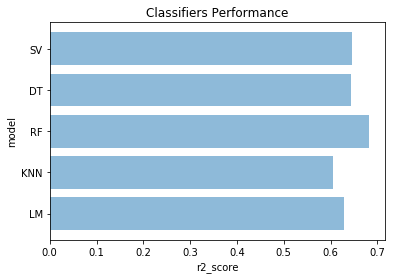

In [44]:
objects = ('LM', 'KNN', 'RF', 'DT', 'SV')
y_pos = np.arange(len(objects))
performance = [0.628, 0.606, 0.681, 0.643, 0.646]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('model')
plt.xlabel('r2_score')
plt.title('Classifiers Performance')

plt.show()

# Classification vs. Regression Comparison

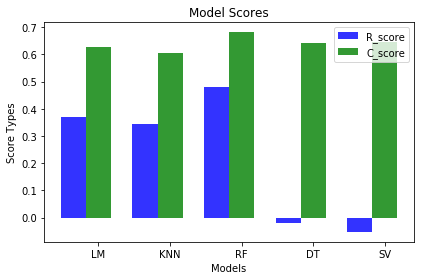

In [45]:
n_groups = 5
performance_reg = (0.370, 0.344, 0.479, -0.021, -0.052)
performance_class = (0.628, 0.606, 0.681, 0.643, 0.646)


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, performance_reg, bar_width, alpha=opacity, color='b', label='R_score')

rects2 = plt.bar(index + bar_width, performance_class, bar_width, alpha=opacity, color='g', label='C_score')

plt.xlabel('Models')
plt.ylabel('Score Types')
plt.title('Model Scores')
plt.xticks(index + bar_width, ('LM', 'KNN', 'RF', 'DT', 'SV'))
plt.legend()

plt.tight_layout()
plt.show()

# Compare models performance

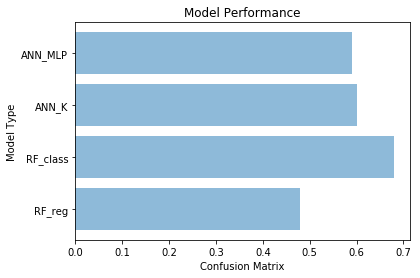

In [46]:
objects = ('RF_reg', 'RF_class', 'ANN_K', 'ANN_MLP')
y_pos = np.arange(len(objects))
performance = [0.48, 0.68, 0.60, 0.59]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('Model Type')
plt.xlabel('Confusion Matrix')
plt.title('Model Performance')

plt.show()

In [51]:
#!pip install rise

In [52]:
#import livelossplot

In [ ]:
import warnings\n",
warnings.filterwarnings('ignore')\n",
import pandas as pd\n",
import numpy as np\n",
import matplotlib.pyplot as plt\n",
import sklearn as sk\n",
import seaborn as sns\n",
sns.set()\n",
import seaborn as sns\n",
    